# Tutorial for `Group Theory library`

This folder contains an extension of the Pedro Abelardo and José Luis Bueso library, based on the [absalg](https://github.com/naftaliharris/Abstract-Algebra) library and available in [github](https://github.com/thealberteitor/Grupos).

## Class Set

To define a set, we will use the class Set in which we have added methods to work with on a set level.

We start by loading the library:

In [1]:
from Set import Set

Now we can call all the implemented methods, for example lets define a Set:

In [2]:
A = Set({1,2,3})
B = Set({2,4})

In [3]:
C = A*B
C

{(2, 4), (1, 2), (3, 4), (2, 2), (3, 2), (1, 4)}

In [4]:
C.is_finite(), C.cardinality()

(True, 6)

In [5]:
A.subsets()

[{1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}, {1, 2, 3}]

In [6]:
A.subsets(2)

[{1, 2}, {1, 3}, {2, 3}]

## Class Function

To represent the binary operation we will use the class Function. It uses the lambda functions that offers Python.

In [7]:
from Function import Function

Let's define the following binary operation:
\\[ S \times S  \to S \\]
\\[ (x,y)  \mapsto (x+y)\%3 \\]




In [8]:
S = Set({0,1,2})
F = Function(S*S, S,lambda x: (x[0]+x[1])%3)
print(F)

f((0, 1))=1
 f((1, 2))=0
 f((2, 1))=0
 f((0, 0))=0
 f((1, 1))=2
 f((2, 0))=2
 f((0, 2))=2
 f((2, 2))=1
 f((1, 0))=1



## Class Group

In [9]:
from Group import *

The constructor of the class Group is somewhat more complicated since it offers us different ways to define a group. 

We can consult the documentation to see the ways to define a group:

In [10]:
Group?

First of all, we will define a group given by a presentation:

In [11]:
gens = ['a']
rels = ['aaaaa']

C5 = Group(gensG=gens, relsG=rels)
print(C5)

Group with 5 elements: {(1, 3, 5, 2, 4), (1, 4, 2, 5, 3), (), (1, 5, 4, 3, 2), (1, 2, 3, 4, 5)}


Let us define a group from scratch. We need a set and a binary operation.

In [12]:
S = Set(range(5))
b_op = Function(S.cartesian(S),S,lambda x: (x[0]+x[1])%5)
G = Group(S,b_op)

Although the way to define both groups is different, they are isomorphic. C5 is the cyclic group with multiplicative notation while G is the cyclic group with additive notation.

In [13]:
G.is_isomorphic(C5)

True

We can, for instance, list the elements in `G`. Observe that this is just a representation of them.

In [14]:
list(G)

[0, 1, 2, 3, 4]

This does not mean that 1 is in `G`.

In [15]:
1 in G

False

However, 1 is in the underlying set of `G`

In [16]:
1 in G.Set

True

In order to see 1 in `G`, we need to create an instance of it as element in `G`. And then, we can operate with it.

In [17]:
one = G(1)
one*one

2

As in this case, `G` is abelian, we can even perform the last operation by using `+`.

In [18]:
one+one

2

Also, in this case powers become multiples.

In [19]:
one**3 == 3*one

True

The Cayley table of `G` can be calculated as follows (multiplicative table).

In [20]:
G.table()

*,0,1,2,3,4
0,0,1,2,3,4
1,1,2,3,4,0
2,2,3,4,0,1
3,3,4,0,1,2
4,4,0,1,2,3


In [21]:
Set([i*one for i in range(10)])

{0, 1, 2, 3, 4}

We can indeed do this last operation by considering the group spanned by `one`; which in this case is `G` itself.

In [22]:
H = G.generate([one])
H == G

True

In [23]:
H == G.generate([1])

True

This means that this group is *cyclic*.

In [24]:
G.is_cyclic()

True

We can also define a subgroup by its elements. The procedure will raise an error if the set is not a subgroup of the given group

In [25]:
G1 = CyclicGroup(6)
H = G1.subgroup_by_elms([0,3])

In [26]:
3 in H.Set

True

In [27]:
H(3) in G1

True

The inverse of an element can be compute in several ways. 

In [28]:
[G.inverse(one), one**-1]

[4, 4]

We can compute the lattice of subgroups of `G`. The output is a dictionary: `n:set of subgroups of order n`.

In [29]:
subgs = G.subgroups()

In [30]:
subgs

{5: {Group( [1] )}, 1: {Group( [0] )}}

Alternatively, we can compute a list with all subgroups with given order.

In [31]:
G.subgroups(5)

Group( [1] )

In particular this implies that `G` is a simple group.

In [32]:
G.is_simple()

True

However, `G1` is not simple, since it has nontrivial subgroups

In [33]:
G1.is_simple()

False

We can print the elements in the subgroups of `G`

In [34]:
for keys,values in subgs.items():
    print(values)


{Group( [1] )}
{Group( [0] )}


Since `G` is abelian, all its subgroups are normal.

In [35]:
G.normal_subgroups()

{5: {Group( [1] )}, 1: {Group( [0] )}}

Indeed groups as `G` are quite common, this is why we dedided to write an specific function to define them: `CyclicGroup`. We will talk later more about it. 

The function `CyclicGroup(n)` returns (as defaul) the group $(\mathbb{Z}_n,+)$.

In [36]:
G.is_isomorphic(CyclicGroup(5))

True

## Permutations

Permutations are a fundamental tool for the study of groups. Indeed permutations (bijective maps) of the set $\{1,\ldots,n\}$ under composition are a group that is not abelian for $n\ge 3$.

We have included a bunch of ways to define a permuation with the class `permutation`.

- `permutation(list of integers)` creates a permutation in which the $i$ goes to the $i$th elmeent in the given list of integers.

- `permutation(sequence of integers)` does the same as above, by considering the sequence as a list.

- `permutation(sequence of tuples)` creates a permutation that is the product of the given tuples, by considering the tuples as cycles.

- `permutation(list of tuples)` does the same as in the preceding case.


In [37]:
permutation(2,3,1,4) == permutation([2,3,1,4])

True

In [38]:
permutation((1,2),(3,4)) == permutation([(1,2),(3,4)])

True

Composition of permutations is performed by using the `*` operator; powers with `**`.

In [39]:
p=permutation((1,2),(3,4))
p*p

()

You may gues from the above output that we are displaying the identity map just by `( )`. Permutations are displayed as a product of disjoint cycles, and printed both in matrix representation and as a product of disjoint cycles.

In [40]:
p

(1, 2)(3, 4)

In [41]:
print(p)

(1, 2)(3, 4)


In [42]:
p**-1 == p

True

In [43]:
p.order()

2

Also we can compute its sign, inversions and decomposition into disjoint cycles.

In [44]:
p.sign()

1

In [45]:
p.inversions()

[(1, 2), (3, 4)]

In [46]:
p.disjoint_cycles()

[(1, 2), (3, 4)]

Finally, we can test if permutation is odd or even.

In [47]:
p.odd_permutation(), p.even_permutation()

(False, True)

## Groups of permutations

As we mentioned above, permutations of $\{1,\ldots, n\}$ with composition as binary operation are a group, which is known as the symmetric group and it is denoted by $S_n$. We have a function to create groups of permutations.

In [48]:
S3 = SymmetricGroup(3)
list(S3)

[(), (2, 3), (1, 2), (1, 3), (1, 3, 2), (1, 2, 3)]

In [49]:
p = S3(permutation(3,2,1))
q = S3(permutation(2,1,3))

In [50]:
H = S3.generate([p,q])

In [51]:
H.group_elems

{(1, 3), (2, 3), (1, 3, 2), (1, 2, 3), (), (1, 2)}

An important subgroup of the symmetric group $S_n$ is the group of all even (sign=1) permutations, which is known as the alternating group and denoted by $A_n$. It is well known that $A_n$ is a normal subgroup of $S_n$.

In [52]:
A3 = AlternatingGroup(3)
list(S3/A3)

[{(1, 2, 3), (), (1, 3, 2)}, {(1, 3), (2, 3), (1, 2)}]

And in this way we are listing odd and even permutations in separate sets.

The symmetric group $S_n$ has always a "copy" of `CyclicGroup(n)`, which is the subgroup of $S_n$ spanned by the cycle $(1\ldots n)$. We can construct it as follows. 

In [53]:
C3 = CyclicGroup(3,"permutations")
list(C3)

[(), (1, 2, 3), (1, 3, 2)]

In [54]:
Z3 = CyclicGroup(3)
list(C3)

[(), (1, 2, 3), (1, 3, 2)]

In [55]:
C3.is_isomorphic(Z3)

True

## Quaternions and the Klein group

Quaternion numbers are an extension of complex numbers in which three imaginary units are used: $i,j,k$.
We can use the Quaternion class to define them.


In [56]:
q = Quaternion(-3,1,2,-8)
p = Quaternion(0,2,3,1)
q+p

 -3+3i+5j-7k

In [57]:
q*p

 20i-26j-4k

In [58]:
(q*p).conjugate() + 2*(q-3*p)

 -6-30i+12j-18k

We will see that i,j,k satisfy the next property:
    $i^{2}=j^{2}=k^{2}=ijk=-1$ .

In [59]:
i = Quaternion(0,1,0,0)
j = Quaternion(0,0,1,0)
k = Quaternion(0,0,0,1)

In [60]:
i*i == j*j == k*k == i*j*k == -1

True

The next function creates the Quaternion group:

In [61]:
Q2 = QuaternionGroup()
list(Q2)

[ 1,  i,  j,  k,  -k,  -j,  -i,  -1]

In [62]:
Q2.center()

Group( [ 1,  -1] )

Klein group can be represented as $\mathbb{Z}_2\times \mathbb{Z}_2$ or as a subgroup of $A_4$ (and thus of $S_4$)

In [63]:
K=KleinGroup()

In [64]:
list(K)

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [65]:
list(KleinGroup("permutations"))

[(), (1, 2)(3, 4), (1, 4)(2, 3), (1, 3)(2, 4)]

It is well known that the quaternions modulo its center yield the Klein group.

In [66]:
Q = Q2/Q2.center()

In [67]:
Q.is_cyclic()

False

In [68]:
Q.is_isomorphic(K)

True

The Quaternion group generalised has presentation:

$Q_n = \langle a,b \mid a^n = b^2, a^{2n}=1,
b^{-1}ab=a^{-1} \rangle \, . $

Its elements are permutations and, for example, we will define the Dyciclic group of order 12.

In [69]:
Q3 = QuaternionGroupGeneralised(3)
print(Q3)

Group with 12 elements: {(1, 10, 4, 11)(2, 9, 6, 12)(3, 8, 7, 5), (1, 5, 4, 8)(2, 10, 6, 11)(3, 9, 7, 12), (), (1, 12, 4, 9)(2, 5, 6, 8)(3, 10, 7, 11), (1, 7, 6, 4, 3, 2)(5, 10, 9, 8, 11, 12), (1, 2, 3, 4, 6, 7)(5, 12, 11, 8, 9, 10), (1, 8, 4, 5)(2, 11, 6, 10)(3, 12, 7, 9), (1, 9, 4, 12)(2, 8, 6, 5)(3, 11, 7, 10), (1, 6, 3)(2, 7, 4)(5, 9, 11)(8, 12, 10), (1, 4)(2, 6)(3, 7)(5, 8)(9, 12)(10, 11), (1, 3, 6)(2, 4, 7)(5, 11, 9)(8, 10, 12), (1, 11, 4, 10)(2, 12, 6, 9)(3, 5, 7, 8)}


In [70]:
Q = QuaternionGroup()
Q2 = QuaternionGroupGeneralised(2)

Q.is_isomorphic(Q2)

True

## Groups of units
The group of units (wrt multiplication) of $\mathbb{Z}_n$ is constructed as follows.

In [71]:
G = GroupOfUnitsModInt(6)
G.table()

*,1,5
1,1,5
5,5,1


## Roots of Unit Group

The roots of unit group is defined by the following class:

In [72]:
G = RootsOfUnitGroup(6)

In [73]:
list(G.Set)

[(0.5,-0.866j), (1.0), (0.5,0.866j), (-0.5,-0.866j), (-0.5,0.866j), (-1.0)]

We can represent the roots in the complex plane:

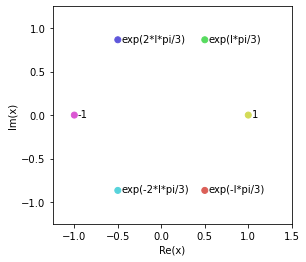

In [74]:
plot(G)

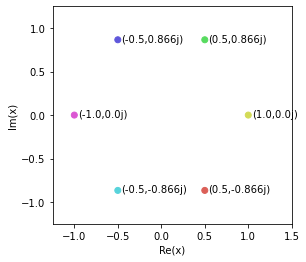

In [75]:
plot(G, mode="binom")

## Dihedral Group

Another important subgroup of the $S_n$ is the Dihedral group of movements that leave invariant an $n$-gon centered in the origin. This group can be represented either by permutations, matrix or by symmetries and rotations that are isomorphic.


In [76]:
D4 = Dihedral(4)
print(D4)

Rotaciones: 
(1.0, -0.0, 0.0, 1.0)
(0.0, -1.0, 1.0, 0.0)
(-1.0, -0.0, 0.0, -1.0)
(-0.0, 1.0, -1.0, -0.0)

Reflexiones 
(1.0, 0.0, 0.0, -1.0)
(0.0, 1.0, 1.0, -0.0)
(-1.0, 0.0, 0.0, 1.0)
(-0.0, -1.0, -1.0, 0.0)



In [77]:
D = DihedralGroup(3, rep='RS')
print(D)

Group with 6 elements: {'R2', 'R1', 'S1', 'S2', 'R0', 'S0'}


In [78]:
D.table()

*,'R0','R2','R1','S1','S2','S0'
'R0','R0','R2','R1','S1','S2','S0'
'R2','R2','R1','R0','S0','S1','S2'
'R1','R1','R0','R2','S2','S0','S1'
'S1','S1','S2','S0','R0','R2','R1'
'S2','S2','S0','S1','R1','R0','R2'
'S0','S0','S1','S2','R2','R1','R0'


In [79]:
D2 = DihedralGroup(3, rep="matrix")
D3 = DihedralGroup(3, rep="permutations")

In [80]:
D.is_isomorphic(D2), D2.is_isomorphic(D3)

(True, True)

## Groups of matrix

We may compute GL(2,p) and SL(2,p) for p prime.

In [81]:
GL2(2).table('letters')

*,e,a,b,c,d,f
e,e,a,b,c,d,f
a,a,d,c,f,e,b
b,b,f,e,d,c,a
c,c,b,a,e,f,d
d,d,e,f,b,a,c
f,f,c,d,a,b,e


In [82]:
G = SL2(3)
G.order()

24

## Cartesian product and quotients
A way to obtain groups from others is by computing cartesian products, or quotients by normal subgroups.

Let us, for instance, compute $G \times G$ where G is the cyclic group of order 5.

In [83]:
G = CyclicGroup(5)

In [84]:
G2 = G.cartesian(G)

The elements of $G\times G$ are tuples. We can as above, instanciate one of its elements.

In [85]:
one2 = G2((1,1))

We can define the cyclic group generated by `one2`, and check that indeed is a subgroup of $G \times G$.

In [86]:
H = G2.generate([one2])
H <= G2

True

Contrary to what happened above, in this case `H` is not $G \times G$ itself; this is due to the fact that $G \times G$ is no longer cyclic. Let us compute a system of generators of $G \times G$.

In [87]:
H == G2

False

In [88]:
G2.is_cyclic()

False

In [89]:
G2.generators()

[(0, 1), (1, 0)]

We already know that every subgroup of an abelian group is normal, and so we can compute the quotient of `G2` by `H`.

In [90]:
G2/H

Group with 5 elements

Its elements are congruency classes, and this is why when listing them, we get a lists of sets.

In [91]:
Q = G2/H
list(Q)

[{(4, 4), (3, 3), (2, 2), (0, 0), (1, 1)},
 {(0, 1), (2, 3), (1, 2), (4, 0), (3, 4)},
 {(1, 3), (2, 4), (0, 2), (4, 1), (3, 0)},
 {(4, 2), (3, 1), (0, 3), (2, 0), (1, 4)},
 {(0, 4), (2, 1), (4, 3), (1, 0), (3, 2)}]

In [92]:
Q.is_abelian()

True

In [93]:
Q.is_cyclic()

True

## Group homomorphisms

In order to define a group homomorphism, we have to provide the domain, codomain and a function that fulfills that is a group morphism

In [94]:
G = CyclicGroup(3)
H = G.cartesian(G)
f = GroupHomomorphism(H,G, lambda x:G(x.elem[1]))

We can compute the kernel, or check wether or not it is injective, surjective or and isomorphism

In [95]:
f.kernel()

Group( [(1, 0), (2, 0), (0, 0)] )

In [96]:
f.is_bijective()

False

In [97]:
f.is_surjective()

True

In [98]:
G = CyclicGroup(6)
f = GroupHomomorphism(G,G, lambda x:2*x)

In [99]:
f.is_injective()

False

In [100]:
list(f.kernel())

[0, 3]

In [101]:
f.function(G(1))

2

Also we can compute this as follows.

In [102]:
f(G(2))

4

For compute a list of all the homomorphisms between two groups:

In [103]:
G = CyclicGroup(18)
H = CyclicGroup(30)
Hom = G.AllHomomorphisms(H)
Hom

[Group homomorphism,
 Group homomorphism,
 Group homomorphism,
 Group homomorphism,
 Group homomorphism,
 Group homomorphism]

Also we can compute the group of automorphisms of a group.

In [104]:
G = CyclicGroup(5)
Aut = G.AutomorphismGroup()
Aut

Group( [Group endomorphism, Group endomorphism, Group endomorphism, Group endomorphism] )

In [105]:
Aut.table('letters')

*,e,a,b,c
e,e,a,b,c
a,a,b,c,e
b,b,c,e,a
c,c,e,a,b


In [106]:
Aut.is_isomorphic(GroupOfUnitsModInt(5))

True

As example, we will construct the semidirect product $C_5 \rtimes C_2$.

In [107]:
B = CyclicGroup(2)
A = CyclicGroup(5)

Thus, we just need to compute the differents $\varphi \colon C_2 \to \operatorname{Aut}(C_5)$

In [108]:
AutA = A.AutomorphismGroup()
Hom = B.AllHomomorphisms(AutA)
Hom

[Group homomorphism, Group homomorphism]

Each homomorphism will give a semidirect product. The trivial homomorphism $\varphi$ gives the direct product while non trivial homomorphism gives differents groups.

In [109]:
hom0 = GroupHomomorphism(B,AutA,lambda x:Hom[1](x),check_morphism_axioms=True)

In [110]:
SP0 = A.semidirect_product(B,hom0)

In [111]:
SP0.table()

*,"(0, 0)","(0, 1)","(4, 0)","(2, 1)","(3, 1)","(1, 1)","(2, 0)","(3, 0)","(1, 0)","(4, 1)"
"(0, 0)","(0, 0)","(0, 1)","(4, 0)","(2, 1)","(3, 1)","(1, 1)","(2, 0)","(3, 0)","(1, 0)","(4, 1)"
"(0, 1)","(0, 1)","(0, 0)","(1, 1)","(3, 0)","(2, 0)","(4, 0)","(3, 1)","(2, 1)","(4, 1)","(1, 0)"
"(4, 0)","(4, 0)","(4, 1)","(3, 0)","(1, 1)","(2, 1)","(0, 1)","(1, 0)","(2, 0)","(0, 0)","(3, 1)"
"(2, 1)","(2, 1)","(2, 0)","(3, 1)","(0, 0)","(4, 0)","(1, 0)","(0, 1)","(4, 1)","(1, 1)","(3, 0)"
"(3, 1)","(3, 1)","(3, 0)","(4, 1)","(1, 0)","(0, 0)","(2, 0)","(1, 1)","(0, 1)","(2, 1)","(4, 0)"
"(1, 1)","(1, 1)","(1, 0)","(2, 1)","(4, 0)","(3, 0)","(0, 0)","(4, 1)","(3, 1)","(0, 1)","(2, 0)"
"(2, 0)","(2, 0)","(2, 1)","(1, 0)","(4, 1)","(0, 1)","(3, 1)","(4, 0)","(0, 0)","(3, 0)","(1, 1)"
"(3, 0)","(3, 0)","(3, 1)","(2, 0)","(0, 1)","(1, 1)","(4, 1)","(0, 0)","(1, 0)","(4, 0)","(2, 1)"
"(1, 0)","(1, 0)","(1, 1)","(0, 0)","(3, 1)","(4, 1)","(2, 1)","(3, 0)","(4, 0)","(2, 0)","(0, 1)"
"(4, 1)","(4, 1)","(4, 0)","(0, 1)","(2, 0)","(1, 0)","(3, 0)","(2, 1)","(1, 1)","(3, 1)","(0, 0)"


Let's see that $D_5 \cong C_5 \rtimes C_2$ when the action is non trivial. 

In [112]:
SP0.is_isomorphic(DihedralGroup(5))

True

Now, we will check that $C_5 \times C_2 \cong C_5 \rtimes C_2$ when the action is trivial.

In [113]:
hom1 = GroupHomomorphism(B,AutA,lambda x:Hom[0](x),check_morphism_axioms=True)
SP1 = A.semidirect_product(B,hom1)

In [114]:
CyclicGroup(5).cartesian(CyclicGroup(2)).is_isomorphic(SP1)

True

## Product and intersection of subgroups
Product and intersection of subgroups of a group $G$ are again subgroups of $G$

In [115]:
Dp4 = DihedralGroup(4,"permutations")
list(Dp4)

[(),
 (1, 2, 3, 4),
 (1, 2)(3, 4),
 (1, 4, 3, 2),
 (1, 4)(2, 3),
 (2, 4),
 (1, 3),
 (1, 3)(2, 4)]

In [116]:
A4 = AlternatingGroup(4)
A4*Dp4

Group( [(1, 3, 2, 4), (1, 3, 4, 2), (3, 4), (1, 2, 4, 3)] )

In [117]:
list(A4.intersection(Dp4))

[(), (1, 2)(3, 4), (1, 4)(2, 3), (1, 3)(2, 4)]

We can for instance, illustrate the third isometry theorem: $KN/N\cong K/(K\cap N)$.

In [118]:
Q1 = (A4*Dp4)/A4
Q2 = Dp4/(A4.intersection(Dp4))
Q1.is_isomorphic(Q2)

True

We can define also $Q_2$ by means of permutations

In [119]:
PQ2 = QuaternionGroup("permutations")

In [120]:
PQ2.group_elems

{(1, 4, 3, 2)(5, 7, 8, 6), (1, 7, 3, 6)(2, 8, 4, 5), (1, 8, 3, 5)(2, 6, 4, 7), (1, 6, 3, 7)(2, 5, 4, 8), (1, 2, 3, 4)(5, 6, 8, 7), (1, 5, 3, 8)(2, 7, 4, 6), (), (1, 3)(2, 4)(5, 8)(6, 7)}

In [121]:
PQ2.is_isomorphic(Q2)

False

## Drawing the lattice of subgroups
We first load the modules and functions needed to draw.

Or we can draw the Cayley graph of $S_3$ with respect to $(1,2,3)$ and $(2,3)$

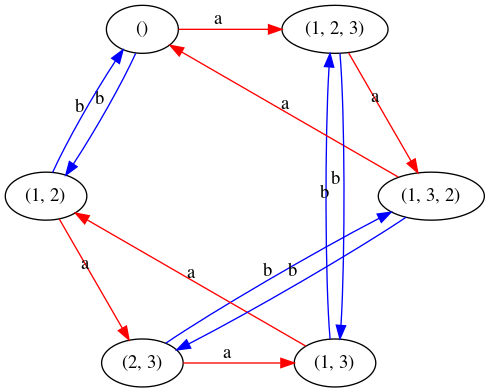

In [122]:
SymmetricGroup(3).CayleyGraph()

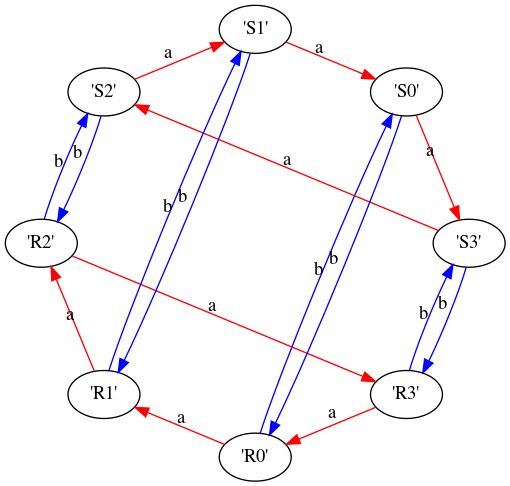

In [123]:
DihedralGroup(4).CayleyGraph()

A,"{0, 1, 2, 3}"
B,{0}
C,"{0, 2}"


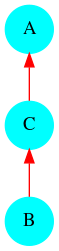

In [124]:
CyclicGroup(4).group_lattice()

A,"{(0, 1), (1, 2), (2, 1), (0, 0), (3, 1), (1, 1), (2, 0), (3, 0), (0, 2), (2, 2), (1, 0), (3, 2)}"
B,"{(0, 0)}"
C,"{(2, 0), (0, 0)}"
D,"{(0, 1), (0, 2), (0, 0)}"
E,"{(1, 0), (2, 0), (0, 0), (3, 0)}"
F,"{(0, 1), (0, 2), (2, 2), (2, 1), (0, 0), (2, 0)}"


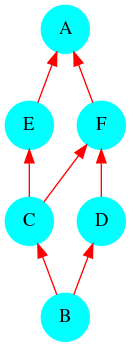

In [125]:
CyclicGroup(4).cartesian(CyclicGroup(3)).group_lattice()

A,"{(1, 3), (2, 3), (1, 3, 2), (1, 2, 3), (), (1, 2)}"
B,{()}
C,"{(2, 3), ()}"
D,"{(1, 3), ()}"
E,"{(), (1, 2)}"
F,"{(1, 2, 3), (), (1, 3, 2)}"


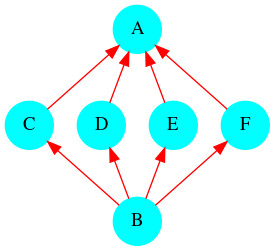

In [126]:
SymmetricGroup(3).group_lattice()

A,"{'S3', 'R2', 'R1', 'R3', 'R0', 'S1', 'S2', 'S0'}"
B,{'R0'}
C,"{'S2', 'R0'}"
D,"{'R0', 'S1'}"
E,"{'R2', 'R0'}"
F,"{'R0', 'S0'}"
G,"{'S3', 'R0'}"
H,"{'R2', 'R0', 'R1', 'R3'}"
I,"{'S3', 'R2', 'R0', 'S1'}"
J,"{'S2', 'R0', 'S0', 'R2'}"


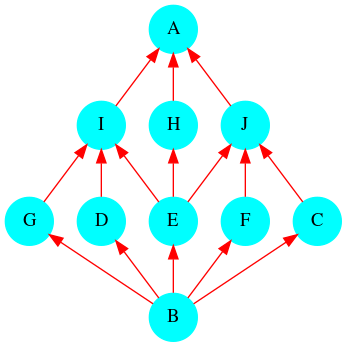

In [127]:
DihedralGroup(4).group_lattice()

## Lateral classes, conjugacy classes and center

Lateral classes are easy to construct; they are considered as sets.

In [128]:
S4 = SymmetricGroup(4)
p = S4(permutation([2,3,4,1]))
p*A4

{(1, 2, 3, 4), (2, 4), (1, 2, 4, 3), (2, 3), (1, 4, 2, 3), (1, 3, 2, 4), (3, 4), (1, 4, 3, 2), (1, 4), (1, 2), (1, 3), (1, 3, 4, 2)}

In [129]:
A4*p

{(1, 2, 3, 4), (2, 4), (1, 2, 4, 3), (1, 4, 2, 3), (2, 3), (1, 3, 2, 4), (3, 4), (1, 4, 3, 2), (1, 4), (1, 2), (1, 3), (1, 3, 4, 2)}

We can also calculate all cosets.

In [130]:
S4.cosets(A4)

[{(),
  (1, 2)(3, 4),
  (1, 2, 3),
  (1, 2, 4),
  (1, 3)(2, 4),
  (1, 3, 2),
  (1, 3, 4),
  (1, 4)(2, 3),
  (1, 4, 2),
  (1, 4, 3),
  (2, 3, 4),
  (2, 4, 3)},
 {(1, 2),
  (1, 2, 3, 4),
  (1, 2, 4, 3),
  (1, 3),
  (1, 3, 2, 4),
  (1, 3, 4, 2),
  (1, 4),
  (1, 4, 2, 3),
  (1, 4, 3, 2),
  (2, 3),
  (2, 4),
  (3, 4)}]

In [131]:
S4.cosets(A4,"right")

[{(),
  (1, 2)(3, 4),
  (1, 2, 3),
  (1, 2, 4),
  (1, 3)(2, 4),
  (1, 3, 2),
  (1, 3, 4),
  (1, 4)(2, 3),
  (1, 4, 2),
  (1, 4, 3),
  (2, 3, 4),
  (2, 4, 3)},
 {(1, 2),
  (1, 2, 3, 4),
  (1, 2, 4, 3),
  (1, 3),
  (1, 3, 2, 4),
  (1, 3, 4, 2),
  (1, 4),
  (1, 4, 2, 3),
  (1, 4, 3, 2),
  (2, 3),
  (2, 4),
  (3, 4)}]

In [132]:
len(_)

2

For a group $G$, the conjugacy class of an element $x$ ($\{gxg^-1\mid g\in G\}$) and of a subgroup $H$ ($\{gHg^{-1}\mid g\in G\}$) can be calculated as follows.

In [133]:
p.conjugacy_class()

{(1, 3, 2, 4), (1, 2, 3, 4), (1, 4, 3, 2), (1, 2, 4, 3), (1, 4, 2, 3), (1, 3, 4, 2)}

And also the set of all conjugacy classes.

In [134]:
S4.conjugacy_classes()

{{(1, 2)(3, 4), (1, 4)(2, 3), (1, 3)(2, 4)},
 {(3, 4), (2, 4), (1, 4), (1, 2), (2, 3), (1, 3)},
 {(1, 3, 2, 4), (1, 2, 3, 4), (1, 4, 3, 2), (1, 2, 4, 3), (1, 4, 2, 3), (1, 3, 4, 2)},
 {(2, 4, 3), (1, 4, 3), (2, 3, 4), (1, 2, 3), (1, 3, 2), (1, 3, 4), (1, 2, 4), (1, 4, 2)},
 {()}}

Also for a subgroup

In [135]:
G = SymmetricGroup(4)
c = G(permutation([1,3,4,2]))
d = G(permutation([1,2,4,3]))
H = G.generate([c,d])
G.conjugacy_class_subgroup(H)

{Group( [(1, 3, 2), (1, 2)] ), Group( [(1, 4, 3), (1, 4)] ), Group( [(2, 3, 4), (3, 4)] ), Group( [(1, 2, 4), (2, 4)] )}

In [136]:
G = DihedralGroup(4)
G.conjugacy_classes_subgroups()

{{Group( ['R0', 'S2'] ), Group( ['R0', 'S0'] )},
 {Group( ['R0'] )},
 {Group( ['R0', 'S1', 'S3'] )},
 {Group( ['R0', 'R2'] )},
 {Group( ['R0', 'R3'] )},
 {Group( ['S0', 'R0', 'R2'] )},
 {Group( ['R0', 'S1'] ), Group( ['R0', 'S3'] )},
 {Group( ['R3', 'S2'] )}}

The normalizar of a subgroup $H$ ($\{g\in G\mid gH=Hg\}$) can be computed with `normalizer`.

In [137]:
S4.normalizer(A4)

Group with 24 elements

And the center (the set of elements that commute with all the elements in $G$) with `center`.

In [138]:
S4.center()

Group( [()] )

The normal closure of a subgroup H in a group G can be computed:

In [139]:
G = SymmetricGroup(3)
a = G(permutation([2,1,3]))
H = G.generate([a])
G.normal_closure(H)

Group( [(1, 2), (2, 3)] )

In [140]:
G = SymmetricGroup(4)
a = G(permutation([2,1,3,4]))
b = G(permutation([2,3,1,4]))
H = G.generate([a])
K = G.generate([b])
G.commutator(H,K)

Group( [(1, 3, 2), (2, 4, 3)] )

## Group actions
Recall that a group action is a map $*:G\times X \to X$ with $G$ a group and $X$ a set such that 

1. $a*(b*x)=(a b)*x$ for all $a,b\in G$ and all $x\in X$.
2. $e*x=x$ for all $x\in X$.

In [141]:
G = SymmetricGroup(3)
f = GroupAction(G,Set({1,2,3}),lambda x,y:x.elem(y))
p = G(permutation(2,3,1))


In [142]:
f.orbit(2)

{1, 2, 3}

In [143]:
f.stabilizer(2)

Group( [(1, 3), ()] )

In [144]:
list(f.stabilizer(2))

[(), (1, 3)]

The group is transitive, as it has a single orbit.

In [145]:
f.orbits()

[{1, 2, 3}]

In [146]:
f.is_transitive()

True

Now let us change the action to the conjugation.

In [147]:
X = G.group_elems
f = GroupAction(G,X,lambda g,x:g*x*g**-1)

In this setting, the orbit coincides with the conjugacy class of the element in the group.

In [148]:
f.orbit(p)

{(1, 2, 3), (1, 3, 2)}

In [149]:
p.conjugacy_class()

{(1, 2, 3), (1, 3, 2)}

And the stabilizer is just the centralizer.

In [150]:
p.centralizer() == f.stabilizer(p)

True

## Todd Coxeter Algorithm


We will explain how the algorithm works. To do this, different examples will be seen.
Let $G$ be a group given by a finite presentation: $G = \langle X \mid R \rangle$, where $X$ is a set of generators and $R$ is a set of relators.
Let $H = \langle h_1, h_2,...,h_r \rangle \leq G $, where the generators $h_i$ are word in $ X^{\pm 1} $.

The procedure that we will follow is the following:
 
 - Read the input data, either by entering the data by hand or by using the readGroup() method, in which a file can be indicated.
 - Apply the Todd Coxeter Algorithm.
 - Obtain the generators of the group and, from these, obtain the rest of the elements to give it a group structure.
 - Use the is\_isomorphic() method to identify each group with known groups.


In [151]:
from ToddCoxeter import CosetTable, readGroup

Internally, Todd Coxeter Algorithm works with a table of lateral cosets of $G$ on $H$. The main class is called CosetTable and the necessary variables are defined in the constructor to apply the algorithm to the given presentation.

Let $G=\langle a,b \mid a^2, b^2, ab=ba \rangle$ and $H=\{1\}$.

In [152]:
gen = ['a','b']
rels = ['aa','bb','abAB']
genH = []

G = CosetTable(gen,rels, genH)
G.CosetEnumeration()

Now, we can show the table of lateral cosets and the associated Schreier graph.
- The number of lateral classes coincides with the index $[G: H]$. 
- In our version, cosets are represented by numbers $(1,2,3 ...)$.

In [153]:
T = G.coset_table()
print(T)

┌───┬───┬───┬───┬───┐
│ C │ a │ A │ b │ B │
├───┼───┼───┼───┼───┤
│ 1 │ 2 │ 2 │ 3 │ 3 │
├───┼───┼───┼───┼───┤
│ 2 │ 1 │ 1 │ 4 │ 4 │
├───┼───┼───┼───┼───┤
│ 3 │ 4 │ 4 │ 1 │ 1 │
├───┼───┼───┼───┼───┤
│ 4 │ 3 │ 3 │ 2 │ 2 │
└───┴───┴───┴───┴───┘


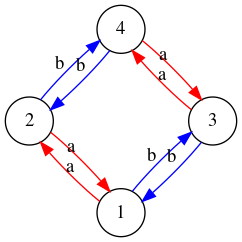

In [154]:
G.schreier_graph(notes=False)

Now, we will obtain the Schreier generators and we will obtain the group generated by these, which will be a Permutation group.

In [155]:
def print_gens(gens):
    for i in range(len(gens)):
        print(f"g{i} = {gens[i]}")
        
generators = G.getGenerators()
print_gens(generators)

g0 = (1, 2)(3, 4)
g1 = (1, 3)(2, 4)


In [156]:
Gr = Group(elems=generators)
print(Gr)

Group with 4 elements: {(), (1, 2)(3, 4), (1, 4)(2, 3), (1, 3)(2, 4)}


Once the group structure is given, the objective now is to identify what other group is isomorphic to this one. We can call the different methods of the library to know how the elements behave.

In [157]:
Gr.table()

*,(),"(1, 2)(3, 4)","(1, 4)(2, 3)","(1, 3)(2, 4)"
(),(),"(1, 2)(3, 4)","(1, 4)(2, 3)","(1, 3)(2, 4)"
"(1, 2)(3, 4)","(1, 2)(3, 4)",(),"(1, 3)(2, 4)","(1, 4)(2, 3)"
"(1, 4)(2, 3)","(1, 4)(2, 3)","(1, 3)(2, 4)",(),"(1, 2)(3, 4)"
"(1, 3)(2, 4)","(1, 3)(2, 4)","(1, 4)(2, 3)","(1, 2)(3, 4)",()


In [158]:
K = KleinGroup()
Gr.is_isomorphic(K)

True

Let $G = \langle a,b \mid a^6 = b^{2} = c^{2} = 1, abc \rangle$ and  $H = \{ b\}$.

We will use the readgroup() method this time.

In [159]:
file = "Groups/3gens.txt"
f = readGroup(file)
print(f)

(['a', 'b', 'c'], ['aaaaaa', 'bb', 'cc', 'abc'], ['b'])


We apply the Todd Coxeter Algorithm with the CosetEnumeration() method.

In [160]:
G = CosetTable(f)
G.CosetEnumeration()

print(G.coset_table())

┌───┬───┬───┬───┬───┬───┬───┐
│ C │ a │ A │ b │ B │ c │ C │
├───┼───┼───┼───┼───┼───┼───┤
│ 1 │ 2 │ 6 │ 1 │ 1 │ 6 │ 6 │
├───┼───┼───┼───┼───┼───┼───┤
│ 2 │ 3 │ 1 │ 6 │ 6 │ 5 │ 5 │
├───┼───┼───┼───┼───┼───┼───┤
│ 3 │ 4 │ 2 │ 5 │ 5 │ 4 │ 4 │
├───┼───┼───┼───┼───┼───┼───┤
│ 4 │ 5 │ 3 │ 4 │ 4 │ 3 │ 3 │
├───┼───┼───┼───┼───┼───┼───┤
│ 5 │ 6 │ 4 │ 3 │ 3 │ 2 │ 2 │
├───┼───┼───┼───┼───┼───┼───┤
│ 6 │ 1 │ 5 │ 2 │ 2 │ 1 │ 1 │
└───┴───┴───┴───┴───┴───┴───┘


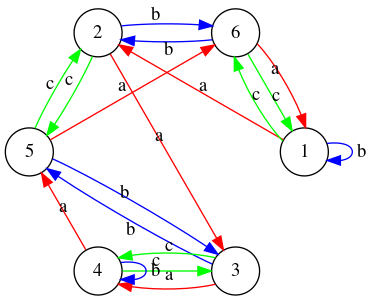

In [161]:
G.schreier_graph(notes=False)

In total 6 vertices are used, so the index $[G:H] = 6$.

Now, we can get Schreier generators that will be used in the constructor of the class Group to define it.

In [162]:
generators = G.getGenerators()
print_gens(generators)


g0 = (1, 2, 3, 4, 5, 6)
g1 = (2, 6)(3, 5)
g2 = (1, 6)(2, 5)(3, 4)


In [163]:
group = Group(elems=generators)
print(group)

Group with 12 elements: {(1, 5)(2, 4), (1, 2, 3, 4, 5, 6), (1, 4)(2, 5)(3, 6), (1, 6)(2, 5)(3, 4), (1, 3)(4, 6), (1, 4)(2, 3)(5, 6), (), (2, 6)(3, 5), (1, 2)(3, 6)(4, 5), (1, 6, 5, 4, 3, 2), (1, 3, 5)(2, 4, 6), (1, 5, 3)(2, 6, 4)}


Now that we have generated the group, we can try to establish an isomorphism with a known group.

In [164]:
group.is_abelian()

False


It is a non-abelian group of order 12 so it must be isomorphic to one of the following groups:
    \\[  G \cong A_4 = \{ a,b \mid a^3=b^3=(ab)^2=1 \} \\]
     \\[  G \cong D_6 = \{ a,b \mid a^6=b^2=1, ab=a^{-1}b \} \\]
    \\[  G \cong Q_3 = \{ a,b \mid a^{6}=1, a^n=b^2, ab=a^{-1}b \}\\]

In [165]:
A = AlternatingGroup(4)
D = DihedralGroup(6)
Q = QuaternionGroupGeneralised(3)

print(group.is_isomorphic(A))
print(group.is_isomorphic(D))
print(group.is_isomorphic(Q))

False
True
False


## Other presentations

We will consider some presentations of groups with high order to show the power of
the implemented method.


Let $G = \langle a,b,c,d \mid a^2 = b^2 = c^2 = d^2 = 1, (ab)^3 = (bc)^3 = (cd)^3 = 1, (ac)^2 = (bd)^2 = (ad)^2 = 1\rangle$ 
and $H=\{1\} \leq G$.

In [166]:
file = "Groups/S5.txt"
f = readGroup(file)
f

(['a', 'b', 'c', 'd'],
 ['aa',
  'bb',
  'cc',
  'dd',
  'ababab',
  'bcbcbc',
  'cdcdcd',
  'acac',
  'bdbd',
  'adad'],
 [])

Let's apply the algorithm and generate the group from the Schreier generators:

In [167]:
G = CosetTable(f)
G.CosetEnumeration()

In [168]:
generators = G.getGenerators()
S = Group(elems = generators)
print(S)

Group with 120 elements. 


Let's see if S is abelian:

In [169]:
S.is_abelian()

False

In [170]:
S5 = SymmetricGroup(5)

In [171]:
S5.is_isomorphic(S)

True


We have seen that the group is isomorphic to the Symmetric group of order 120.

Let $G = \langle a,b,c \mid a^3 =b^2=c^2, (ab)^4, (ac)^2, (bc)^3 \rangle$ and $H = \langle a,b \rangle$.

In [172]:
file = "Groups/G0.txt"
f = readGroup(file)
f

(['a', 'b', 'c'],
 ['aaa', 'bb', 'cc', 'abababab', 'acac', 'bcbcbc'],
 ['a', 'b'])

In [173]:
C = CosetTable(f)
C.CosetEnumeration()
generators = C.getGenerators()

In [174]:
S = Group(elems=generators)
S.order()

576

In [175]:
S.is_abelian()

False


In this case, after applying the different methods of Todd Coxeter Algorithm, we have seen that it is a non-abelian group of order 576; however, we can not establish any isomorphism with known groups since we do not know any of that order.